# Project: Investigate a Dataset: TMDb Data Analysis & Visualization

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset selected for this project includes the TMDb dataset for movies and we will investigate yearly movies trends overtime with these different variables.

Dependent variable - Revenue

Independent variables - Budget, Popularity and Runtime

Average trends per year to explore will include:

Budget vs Revenue - to see if the return on investment was a success

Popularity vs Revenue - to see if the popular movies generated more money

Runtime vs Revenue - to see if longer movies are generating more money

We will also be looking at the trends and proportions of vote average ratings based on vote count, popularity and revenue.

In [16]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
df = pd.read_csv('tmdb_movies.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties
Variables with Null Values:
- imdb_id
- cast
- homepage
- director
- tagline
- keywords
- overview
- genres
- production_companies

For each row that is blank with these variables need to be filled with NA to check to make sure that there are nothing blank left in the dataframe. Also we have to drop blank imdb_id as we only want the unique records so since 10 rows are missing out of the 10866 we will omit them out of our dataset. There was also 1 duplicate row so the record count is now 10865. In budget and revenue there are zeros in the dataset so those have to be replaced with NA to exclude those values from the dataset

In [17]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [18]:
#returns dimensions of the dataframe
df.shape

(10866, 21)

In [19]:
# this displays a concise summary of the dataframe,
# including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [20]:
#checks for null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [21]:
# check for duplicates in the data
sum(df.duplicated())

1

### Data Cleaning (Dropping rows, dropping duplicates, then filling in blanks)

In [22]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# drop blank imdb_id rows
df.dropna(subset=['imdb_id'], inplace=True)

In [23]:
# check rows have been dropped for imdb_id
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 21 columns):
id                      10856 non-null int64
imdb_id                 10856 non-null object
popularity              10856 non-null float64
budget                  10856 non-null int64
revenue                 10856 non-null int64
original_title          10856 non-null object
cast                    10780 non-null object
homepage                2934 non-null object
director                10816 non-null object
tagline                 8039 non-null object
keywords                9369 non-null object
overview                10853 non-null object
runtime                 10856 non-null int64
genres                  10835 non-null object
production_companies    9831 non-null object
release_date            10856 non-null object
vote_count              10856 non-null int64
vote_average            10856 non-null float64
release_year            10856 non-null int64
budget_adj              1

In [24]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [25]:
# confirm correction by rechecking for duplicates in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
homepage                2934 non-null object
director                10815 non-null object
tagline                 8038 non-null object
keywords                9368 non-null object
overview                10852 non-null object
runtime                 10855 non-null int64
genres                  10834 non-null object
production_companies    9830 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              1

In [26]:
#fill in blank cells with NA
df['imdb_id'] = df['imdb_id'].fillna("NA")
df['cast'] = df['cast'].fillna("NA")
df['homepage'] = df['homepage'].fillna("NA")
df['director'] = df['director'].fillna("NA")
df['tagline'] = df['tagline'].fillna("NA")
df['keywords'] = df['keywords'].fillna("NA")
df['overview'] = df['overview'].fillna("NA")
df['genres'] = df['genres'].fillna("NA")
df['production_companies'] = df['production_companies'].fillna("NA")

#replace all zeros in revenue and budget with NA
df['revenue'] = df['revenue'].replace(0,"NA")
df['budget'] = df['budget'].replace(0,"NA")

In [27]:
# check all rows have been filled with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 21 columns):
id                      10855 non-null int64
imdb_id                 10855 non-null object
popularity              10855 non-null float64
budget                  10855 non-null object
revenue                 10855 non-null object
original_title          10855 non-null object
cast                    10855 non-null object
homepage                10855 non-null object
director                10855 non-null object
tagline                 10855 non-null object
keywords                10855 non-null object
overview                10855 non-null object
runtime                 10855 non-null int64
genres                  10855 non-null object
production_companies    10855 non-null object
release_date            10855 non-null object
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj         

In [28]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation S

In [29]:
# save this clean copy for exploratory data analysis
df.to_csv('tmdb_movies_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1

How are budgets, popularity and runtimes trending over time in relation to revenue and what are their average yearly growths?

In [30]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#import the clean data
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('tmdb_movies_clean.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation

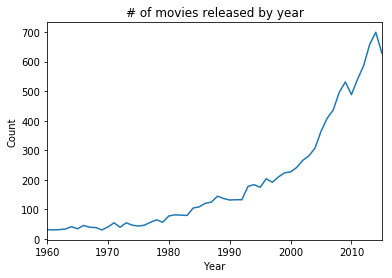

In [31]:
#plots yearly trending movies released on a time series
movies_year = df.groupby('release_year').size()
ax = movies_year.plot.line()
ax.set(title = '# of movies released by year', xlabel = 'Year', ylabel = 'Count');

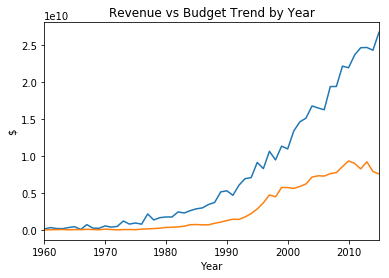

In [32]:
#plots yearly trending revenue & budget on a time series
movies_year = df.groupby('release_year')['revenue'].sum()
movies_year2 = df.groupby('release_year')['budget'].sum()
ax = movies_year.plot.line()
ax2 = movies_year2.plot.line()
ax.set(title = 'Revenue vs Budget Trend by Year', xlabel = 'Year', ylabel = '$');

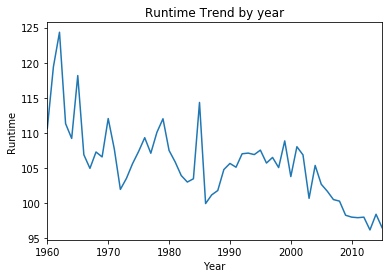

In [33]:
#plots yearly trending runtime on a time series
movies_year3 = df.groupby('release_year')['runtime'].mean()
ax3 = movies_year3.plot.line()
ax3.set(title = 'Runtime Trend by year', xlabel = 'Year', ylabel = 'Runtime');

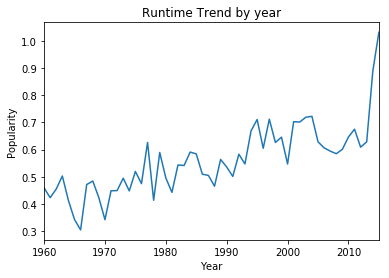

In [34]:
#plots yearly trending runtime on a time series
movies_year4 = df.groupby('release_year')['popularity'].mean()
ax4 = movies_year4.plot.line()
ax4.set(title = 'Runtime Trend by year', xlabel = 'Year', ylabel = 'Popularity');

# Observation - Yearly Trends

- Over the years the movie industry has been growing with more movies being released every year
- Revenues have increased expotentially compared to how much was initially budgetted for the films
- Runtimes have gotten shorter over time which could mean that production companies want to separate movies into to different series to increase revenue for part 2 of their movies
- Popularity has also increased over the years as viewers enjoy the more modern movies due to the change in technology

In [35]:
#Group data by their release year to find averages over time
df.groupby('release_year').mean()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
release_year,,,,,,,,,
1960,15715.281250,0.458932,2.450772e+06,2.071500e+07,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07
1961,18657.000000,0.422827,3.549000e+06,3.377202e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07
1962,17001.062500,0.454783,3.908723e+06,2.395332e+07,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07
1963,16556.000000,0.502706,6.666500e+06,2.677214e+07,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07
1964,17379.571429,0.412428,3.589378e+06,4.262272e+07,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07
1965,17564.714286,0.342587,6.382283e+06,9.161637e+07,118.171429,52.000000,6.194286,1.388168e+07,9.057670e+07
1966,16514.000000,0.304112,4.796233e+06,1.694734e+07,106.891304,31.739130,6.128261,8.405522e+06,1.237527e+07
1967,17429.700000,0.471154,5.591789e+06,5.270247e+07,104.950000,77.550000,6.242500,1.644849e+07,1.205763e+08
1968,18628.589744,0.484202,4.795933e+06,2.206108e+07,107.282051,108.128205,6.379487,1.156367e+07,4.255388e+07


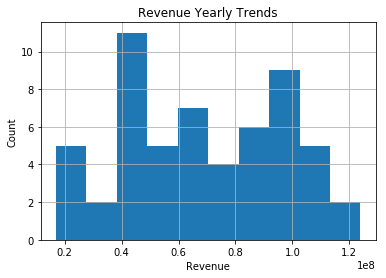

In [36]:
#plots average trending revenue on a histogram
df.groupby('release_year').mean()['revenue'].hist();
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Revenue Average Trends per Year');

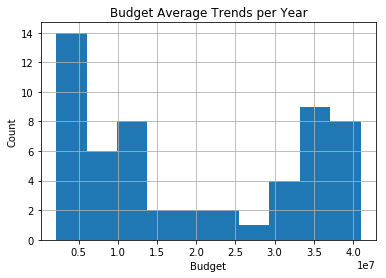

In [37]:
#plots average trending budget on a histogram
df.groupby('release_year').mean()['budget'].hist();
plt.xlabel('Budget')
plt.ylabel('Count')
plt.title('Budget Average Trends per Year');

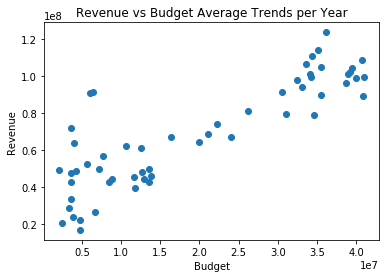

In [38]:
#plots average Revenue vs Budget for each year on a scatter graph
df_avg = df.groupby('release_year').mean()
plt.scatter(x = df_avg['budget'], y = df_avg['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Revenue vs Budget Average Trends per Year');

# Observation - Revenue & Budget
- Revenue distribution has no skewness which makes it unpredictable to forecast

- Budget distribution is skewed to the right and left which means that on average majority of the movies were either under budget or over budget

- The revenue budget curve is logarithmic related as average budget increases so does revenue increases at a gradual rate which could mean technology is improving the quality of CGI, graphics and editing quality for more modern movies which increases the cost of budgeting

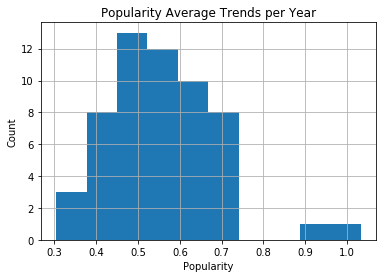

In [39]:
#plots average trending popularity on a histogram
df.groupby('release_year').mean()['popularity'].hist();
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Popularity Average Trends per Year');

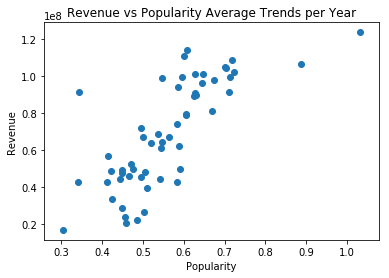

In [40]:
#plots average Revenue vs Popularity for each year on a scatter graph
plt.scatter(x = df_avg['popularity'], y = df_avg['revenue'])
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Revenue vs Popularity Average Trends per Year');

# Observation - Revenue & Popularity
- Popularity distribution is skewed to the right where the maximum peak is between the ranges of 0.44 and 0.51

- There are no values that lie between the ranges of 0.73 and 0.88 which could tell us that the datasets above 0.88 could skew our results and could potentially be outliers

- The revenue popularity curve has a positive correlation as popularity of movies increase so does the revenue generated at the box office

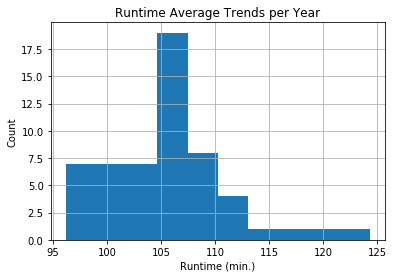

In [41]:
#plots average trending runtime on a histogram
df.groupby('release_year').mean()['runtime'].hist();
plt.xlabel('Runtime (min.)')
plt.ylabel('Count')
plt.title('Runtime Average Trends per Year');

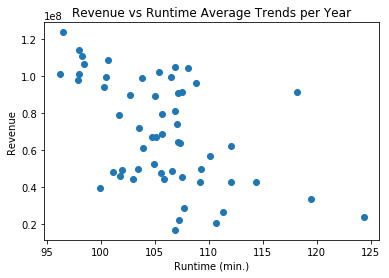

In [42]:
#plots average Revenue vs Runtimes for each year on a scatter graph
plt.scatter(x = df_avg['runtime'], y = df_avg['revenue'])
plt.xlabel('Runtime (min.)')
plt.ylabel('Revenue')
plt.title('Revenue vs Runtime Average Trends per Year');

# Observation - Revenue & Runtime

- Runtime distribution is skewed a little to the right and most movies tend to be approximately 105 - 107.5 min. in length

- There is a negative correlation between average runtime and revenue as runtime increases the revenue starts to decrease which could mean people do not want to be sitting through longer movies rather shorter films are more preferred

In [43]:
df_avg.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,56.000000,56.000000,5.600000e+01,5.600000e+01,56.000000,56.000000,56.000000,5.600000e+01,5.600000e+01
mean,32165.603433,0.559693,1.969802e+07,6.941378e+07,105.714644,156.556414,6.104371,1.557752e+07,6.032251e+07
std,52448.343738,0.128434,1.402193e+07,2.875142e+07,5.508458,74.084952,0.200420,7.326850e+06,2.160738e+07
min,13496.075188,0.304112,2.134074e+06,1.694734e+07,96.179331,31.739130,5.795392,4.729510e+06,1.237527e+07
25%,15703.352791,0.469625,6.282823e+06,4.596305e+07,101.910776,98.832785,5.958838,1.088323e+07,4.633366e+07
50%,17469.025000,0.546928,1.371213e+07,6.715704e+07,105.678699,139.040793,6.041295,1.390314e+07,5.802844e+07
75%,19105.754121,0.626934,3.427425e+07,9.675663e+07,107.593247,206.899610,6.242106,1.797158e+07,6.832655e+07
max,296669.068471,1.032126,4.095764e+07,1.239002e+08,124.343750,325.949848,6.703636,3.369195e+07,1.376362e+08


In [44]:
#Labels the groups for revenue
bin_names = ['Low','Medium','Moderately High','High']

In [45]:
# Creates revenue divisions
df_avg['revenue_levels'] = pd.qcut(df_avg['revenue'], [0, .25, .5, .75, 1], labels = bin_names)

# Check column has been created
df_avg

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,revenue_levels
release_year,,,,,,,,,,
1960,15715.281250,0.458932,2.450772e+06,2.071500e+07,110.656250,77.531250,6.325000,5.082036e+06,3.340991e+07,Low
1961,18657.000000,0.422827,3.549000e+06,3.377202e+07,119.419355,77.580645,6.374194,1.085687e+07,7.947167e+07,Low
1962,17001.062500,0.454783,3.908723e+06,2.395332e+07,124.343750,74.750000,6.343750,1.232693e+07,4.856238e+07,Low
1963,16556.000000,0.502706,6.666500e+06,2.677214e+07,111.323529,82.823529,6.329412,1.535687e+07,3.924580e+07,Low
1964,17379.571429,0.412428,3.589378e+06,4.262272e+07,109.214286,74.690476,6.211905,6.608980e+06,5.707603e+07,Low
1965,17564.714286,0.342587,6.382283e+06,9.161637e+07,118.171429,52.000000,6.194286,1.388168e+07,9.057670e+07,Moderately High
1966,16514.000000,0.304112,4.796233e+06,1.694734e+07,106.891304,31.739130,6.128261,8.405522e+06,1.237527e+07,Low
1967,17429.700000,0.471154,5.591789e+06,5.270247e+07,104.950000,77.550000,6.242500,1.644849e+07,1.205763e+08,Medium
1968,18628.589744,0.484202,4.795933e+06,2.206108e+07,107.282051,108.128205,6.379487,1.156367e+07,4.255388e+07,Low


In [46]:
# Use groupby to get the mean years for each revenue level
df_avg.groupby(['revenue_levels'], as_index = False)['revenue'].mean()
low_a = df_avg.query('revenue_levels == "Low"').iloc[0:1, :]
med_a = df_avg.query('revenue_levels == "Medium"').iloc[1:2, :]
mod_a = df_avg.query('revenue_levels == "Moderately High"').iloc[2:3, :]
high_a = df_avg.query('revenue_levels == "High"').iloc[3:4, :]

mean_revenue_low_a = low_a['revenue'].mean()
mean_revenue_med_a = med_a['revenue'].mean()
mean_revenue_mod_a = mod_a['revenue'].mean()
mean_revenue_high_a = high_a['revenue'].mean()

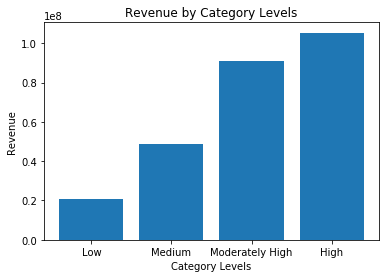

In [47]:
# Create a bar chart with proper labels
locations = [1, 2, 3, 4]
heights = [mean_revenue_low_a, mean_revenue_med_a, mean_revenue_mod_a, mean_revenue_high_a]
labels = ['Low', 'Medium', 'Moderately High', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Revenue by Category Levels')
plt.xlabel('Category Levels')
plt.ylabel('Revenue');

# Observation - Revenue by Category Levels
- There is a greater proportion of movies produced on average that bring in a revenue of 50 million
- This positive trend upwards could mean that more modern movies have greater cost implications

### Research Question 2 

Does the vote counts and their average ratings produce a higher revenue for the movies and does popularity rise as a result of these vote counts?

In [48]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#view corrections for each variable
df_avg.corr(method='pearson')

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,0.612610,0.297697,0.420499,-0.441775,0.539964,-0.297719,-0.148336,-0.299723
popularity,0.612610,1.000000,0.756591,0.760768,-0.488974,0.849314,-0.574979,0.458952,-0.100506
budget,0.297697,0.756591,1.000000,0.855793,-0.513022,0.868544,-0.793314,0.793021,-0.247693
revenue,0.420499,0.760768,0.855793,1.000000,-0.513465,0.855969,-0.653625,0.581957,0.074866
runtime,-0.441775,-0.488974,-0.513022,-0.513465,1.000000,-0.612715,0.524770,-0.073168,0.300077
vote_count,0.539964,0.849314,0.868544,0.855969,-0.612715,1.000000,-0.658819,0.505434,-0.215568
vote_average,-0.297719,-0.574979,-0.793314,-0.653625,0.524770,-0.658819,1.000000,-0.557569,0.377204
budget_adj,-0.148336,0.458952,0.793021,0.581957,-0.073168,0.505434,-0.557569,1.000000,0.050086
revenue_adj,-0.299723,-0.100506,-0.247693,0.074866,0.300077,-0.215568,0.377204,0.050086,1.000000


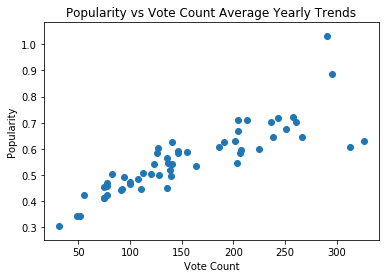

In [49]:
#plots average Popularity vs Vote Count for each year on a scatter graph
plt.scatter(x = df_avg['vote_count'], y = df_avg['popularity'])
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.title('Popularity vs Vote Count Average Yearly Trends');

# Observation - Popularity & Vote Count

- There is a positive correlation between popularity and vote count as vote count increases so does the popularity of the movies
- This could mean when people voted they enjoyed watching movies that could lead to higher revenue which will be looked at in the graph below

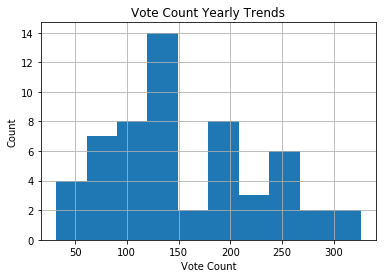

In [50]:
#plots yearly trending vote count on a histogram
df.groupby('release_year').mean()['vote_count'].hist();
plt.xlabel('Vote Count')
plt.ylabel('Count')
plt.title('Vote Count Yearly Trends');

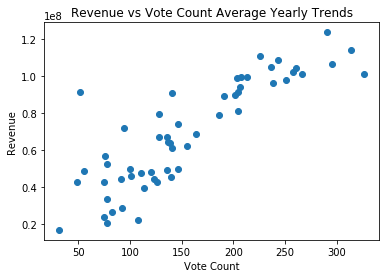

In [51]:
#plots average Revenue vs Vote Count for each year on a scatter graph
plt.scatter(x = df_avg['vote_count'], y = df_avg['revenue'])
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.title('Revenue vs Vote Count Average Yearly Trends');

# Observation - Revenue & Vote Count

- The vote count distribution is skewed to the right with the maximum count ranging from 120 to 150 and the lowest peak being from 150 to 180

- There is positive correlation between revenue and vote count as vote count increases so does revenue which may mean that people who attended the movies also gave a vote after the show

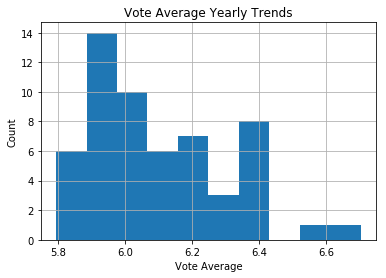

In [52]:
#plots yearly trending average vote on a histogram
df.groupby('release_year').mean()['vote_average'].hist();
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.title('Vote Average Yearly Trends');

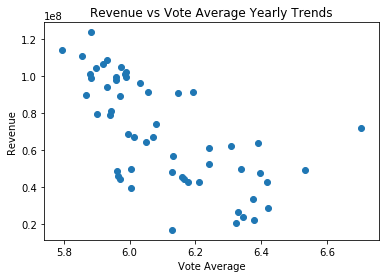

In [53]:
#plots average Revenue vs Vote Average for each year on a scatter graph
plt.scatter(x = df_avg['vote_average'], y = df_avg['revenue'])
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.title('Revenue vs Vote Average Yearly Trends');

# Observation - Revenue & Vote Average

- The vote average distribution is skewed right at its most frequent average voting rating of 5.9

- There is a negative correlation between vote average and revenue as a higher vote average results in lower revenue which could mean that even though the movie has a bad reviews, viewers would still be inclined to watch it in theatres

# Limitations

- Taking into account all the variables we have worked with such as popularity, vote count, vote average, runtime, budget and revenue there are certain restriction to using this data
- The numerical values we use do not specify the type of currency being used which could be in GBP, USD or yen.
- Some of these movies could be in different languages in different regions of the world which could be have bias votes or stereotypical ratings to skew the results as different culture prefer different types of movies
- Looking at the older movies compared to the more modern movies, there could be different age group that could be giving the popularity ratings based on the types of movies they like based on different genres and so taking into account the population demographic is what is limiting us from determining an accurate number of each category
- We can also observe that there isn't anything to do with promotions or ticket sales that viewers could have gotten into seeing the movies that will contribute directly to revenue. There could be ticket scalping involved, SCENE points for number of previous movies seen and discounts on concession stand items which could influence a person to go see a movie just for the sake of benefits

<a id='conclusions'></a>
## Conclusions

- Over the years the movie industry has had a positive trend in terms of growing popularity, revenue and more highly invested into technology
- In order for production companies to succeed in terms of their growth they had to cut down on runtimes over the year if movies ended up being too long or they wanted to divide out the movies into 2 parts to increase revenue
- Between revenue and budget there is an interesting trend that takes into account the investment that goes into producing a movie. There is logarithmic relationship that might infer that as more modern movies are produced, the more technology that goes into making the film such as using CGI, video editing and sound effects which has a higher cost implication therefore increasing the budget
- There is a negative relation between revenue and runtime as people may not want to sit through longer movies feeling sleepy and bored during the film rather they would want to be engaged in the most optimal timeframe
- Popularity and revenue have a direct relationship and taken into consideration vote count will enhance viewership
- Vote counts are positively correlated while vote averages are negatively related to revenue which needs more investigation into how that has happened
- Overall these variables are just correlations and it does not imply causation

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])